In [1]:
import numpy as np
import scipy.signal as ss
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
im = np.asarray(Img.open('birds1.jpeg'))
r,g,b = im[:,:,0], im[:,:,1], im[:,:,2]
bird = 0.2989 * r + 0.5870 * g + 0.1140 * b
im1 = np.asarray(Img.open('template.jpeg'))
r1,g1,b1 = im1[:,:,0], im1[:,:,1], im1[:,:,2]
template = 0.2989 * r1 + 0.5870 * g1 + 0.1140 * b1
tempflip = np.flip(np.flip(template, 0), 1)
crosscre = ss.convolve2d(bird, tempflip, boundary='symm', mode='same').astype(np.float)

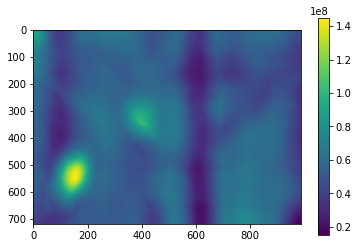

In [3]:
plt.imshow(crosscre)
plt.colorbar()

In [4]:
def ncc(img, tplt, stdtemp):
    return np.mean((img-np.mean(img))*tplt)/np.std(img)/stdtemp

(112, 109)


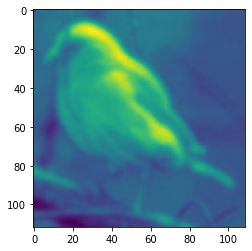

In [5]:
row, col = len(template)//2, len(template[0])//2
bird1 = np.pad(bird,((row, row),(col, col)),mode = "constant", constant_values = 0)
ret = np.zeros(np.shape(bird1)).astype(np.float)
size = np.shape(template)[0]*np.shape(template)[1]
stdtemp = np.std(template)
meantemp = np.mean(template)
template = template - meantemp
for i in range(row, len(bird1)-row):
    for j in range(col, len(bird1[0])-col):
        ret[i-row][j-col] = ncc(bird1[i - row: i + row,j - col: j + col + 1],template, stdtemp)

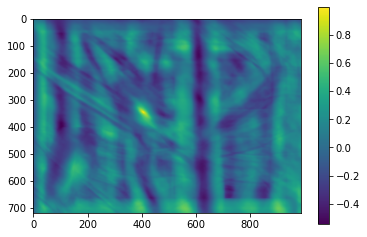

In [6]:
correlate = ret[:len(bird),:len(bird[0])]
plt.imshow(correlate)
plt.colorbar()

In [7]:
axis = np.where(correlate==np.amax (correlate))
x,y = axis[0][0],axis[1][0]
birddd = cv2.rectangle(bird, (y-col, x-row), (y+col, x+row), (255, 0, 0))

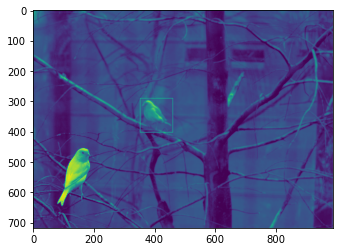

In [9]:
plt.imshow(birddd)

In [10]:
im2 = np.asarray(Img.open('birds2.jpeg'))
r2,g2,b2 = im2[:,:,0], im2[:,:,1], im2[:,:,2]
bird2 = 0.2989 * r2 + 0.5870 * g2 + 0.1140 * b2

In [11]:
bird21 = np.pad(bird2,((row, row),(col, col)),mode = "constant", constant_values = 0)
ret1 = np.zeros(np.shape(bird21)).astype(np.float)
for i in range(row, len(bird21)-row):
    for j in range(col, len(bird21[0])-col):
        ret1[i-row][j-col] = ncc(bird21[i - row: i + row,j - col: j + col + 1],template, stdtemp)

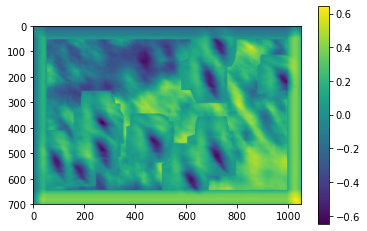

In [12]:
correlate1 = ret1[:len(bird2),:len(bird2[0])]
plt.imshow(correlate1)
plt.colorbar()

In [13]:
axis = np.where(correlate1==np.amax (correlate1))
x,y = axis[0][0],axis[1][0]
birddd = cv2.rectangle(bird2, (y-col, x-row), (y+col, x+row), (255, 0, 0))

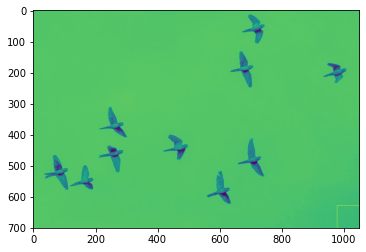

In [14]:
plt.imshow(birddd)